In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [29]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df.tail(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

### Create scatter plot

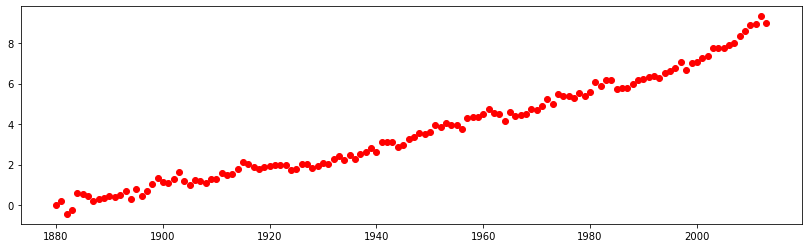

In [7]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter('Year', 'CSIRO Adjusted Sea Level', data = df, color="r")

### Create first line of best fit (The whole dataset)


In [44]:
result_best = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
#print(result_best)

[1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,

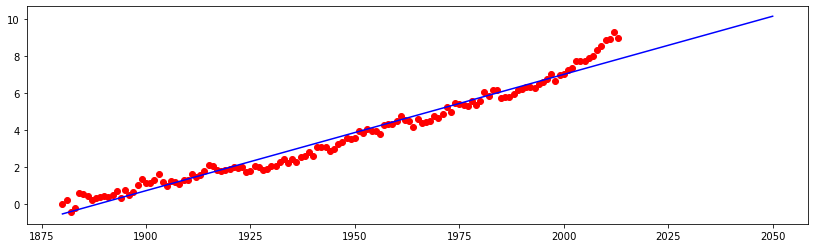

In [46]:
# Create a list of values in the best fit line
abline_values = [result_best.slope * i + result_best.intercept for i in list(range(df.Year[0],2051))]

fig, ax = plt.subplots(figsize=(14, 4))

ax.scatter('Year', 'CSIRO Adjusted Sea Level', data = df, color="r")
ax.plot(list(range(df.Year[0],2051)), abline_values, 'b')

### Create second line of best fit (2000 - :)

In [57]:
df_2000 = df[df['Year'] >= 2000]
df_2000.head(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698


In [49]:
result_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
print(result_2000)

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


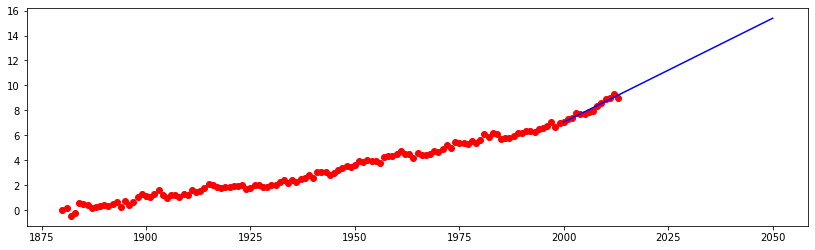

In [70]:
# Create a list of values in the best fit line
abline_values = [result_2000.slope * i + result_2000.intercept for i in list(range(df_2000['Year'].iloc[0],2051))]

fig, ax = plt.subplots(figsize=(14, 4))

ax.scatter('Year', 'CSIRO Adjusted Sea Level', data = df, color="r")
ax.plot(list(range(df_2000['Year'].iloc[0],2051)), abline_values, 'b')

### Plotting lines in the same plot

Text(0, 0.5, 'Sea Level (inches)')

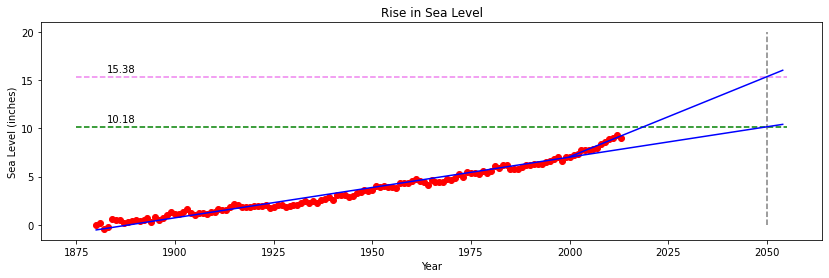

In [114]:
# Create a list of values in the best fit line
abline_all = [result_best.slope * i + result_best.intercept for i in list(range(df.Year[0],2055))]
abline_2000 = [result_2000.slope * i + result_2000.intercept for i in list(range(df_2000['Year'].iloc[0],2055))]

fig, ax = plt.subplots(figsize=(14, 4))

ax.scatter('Year', 'CSIRO Adjusted Sea Level', data = df, color="r")
ax.plot(list(range(df.Year[0],2055)), abline_all, 'b')
ax.plot(list(range(df_2000['Year'].iloc[0],2055)), abline_2000, 'b')
ax.vlines(2050, 0, 20, colors='gray', linestyles='dashed')

sea_all_2050 = result_best.slope * 2050 + result_best.intercept 
sea_2000_2050 = result_2000.slope * 2050 + result_2000.intercept

ax.hlines(sea_all_2050, 1875, 2055, colors='green', linestyles='dashed')
ax.text(1890, 11, str(sea_all_2050.round(2)), ha="right", va="center")

ax.hlines(sea_2000_2050, 1875, 2055, colors='violet', linestyles='dashed')
ax.text(1890, 16.2, str(sea_2000_2050.round(2)), ha="right", va="center")

# Adding labels
ax.set_title("Rise in Sea Level")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")